# Inisialisasi Github

# Aku Import

In [ ]:
import os
import random
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from glob import glob
from IPython.display import display
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Ganti path ke dataset, download dulu yang di kaggle terus up di drive
dataset_path = '/content/drive/Othercomputers/My Laptop/Semester 6/Pengolahan CItra/Teori/Tugas Besar/dataset-meat'

# GLCM Start

In [ ]:
def extract_glcm_features(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    glcm = graycomatrix(gray, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)
    features = [
        graycoprops(glcm, 'contrast')[0, 0],
        graycoprops(glcm, 'dissimilarity')[0, 0],
        graycoprops(glcm, 'homogeneity')[0, 0],
        graycoprops(glcm, 'energy')[0, 0],
        graycoprops(glcm, 'correlation')[0, 0],
        graycoprops(glcm, 'ASM')[0, 0]
    ]
    return features

data = []
target = []

In [ ]:
# Loop semua folder dalam dataset
for label in os.listdir(dataset_path):
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):
        for file in os.listdir(label_path):
            file_path = os.path.join(label_path, file)
            try:
                features = extract_glcm_features(file_path)
                data.append(features)
                target.append(label)
            except Exception as e:
                print(f"❌ Error on {file}: {e}")

print("✅ Fitur berhasil diekstrak dari seluruh gambar.")

✅ Fitur berhasil diekstrak dari seluruh gambar.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Latih Model Pake Random Forest

In [ ]:
df = pd.DataFrame(data, columns=['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM'])
df['label'] = target

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("📝 Classification Report:\n", classification_report(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

📝 Classification Report:
                    precision    recall  f1-score   support

Horse Meat (kuda)       0.76      0.84      0.80        31
      Meat (sapi)       0.61      0.69      0.65        16
      Pork (babi)       0.67      0.54      0.60        26

         accuracy                           0.70        73
        macro avg       0.68      0.69      0.68        73
     weighted avg       0.70      0.70      0.69        73

📊 Confusion Matrix:
 [[26  2  3]
 [ 1 11  4]
 [ 7  5 14]]


In [ ]:
def show_prediction_with_glcm(image_path, model):
    # Baca gambar dan ubah ke grayscale
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Buat GLCM
    glcm = graycomatrix(gray, distances=[5], angles=[0], levels=256, symmetric=True, normed=True)

    # Prediksi
    features = [
        graycoprops(glcm, 'contrast')[0, 0],
        graycoprops(glcm, 'dissimilarity')[0, 0],
        graycoprops(glcm, 'homogeneity')[0, 0],
        graycoprops(glcm, 'energy')[0, 0],
        graycoprops(glcm, 'correlation')[0, 0],
        graycoprops(glcm, 'ASM')[0, 0]
    ]
    prediction = model.predict([features])[0]

    # Tampilkan semuanya dalam 1 slide
    plt.figure(figsize=(18, 6))

    # 1. Gambar asli
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Gambar Asli")
    plt.axis('off')

    # 2. Gambar grayscale
    plt.subplot(1, 3, 2)
    plt.imshow(gray, cmap='gray')
    plt.title("Grayscale")
    plt.axis('off')

    # 3. Heatmap GLCM
    plt.subplot(1, 3, 3)
    glcm_matrix = glcm[:, :, 0, 0]  # Ambil matriks GLCM 2D
    sns.heatmap(glcm_matrix, cmap='viridis')
    plt.title(f"GLCM Heatmap\nPrediksi: {prediction}")

    plt.tight_layout()
    plt.show()

# Upload Gambar Untuk di prediksi

Saving IMG_20220110_093011.jpg to IMG_20220110_093011.jpg


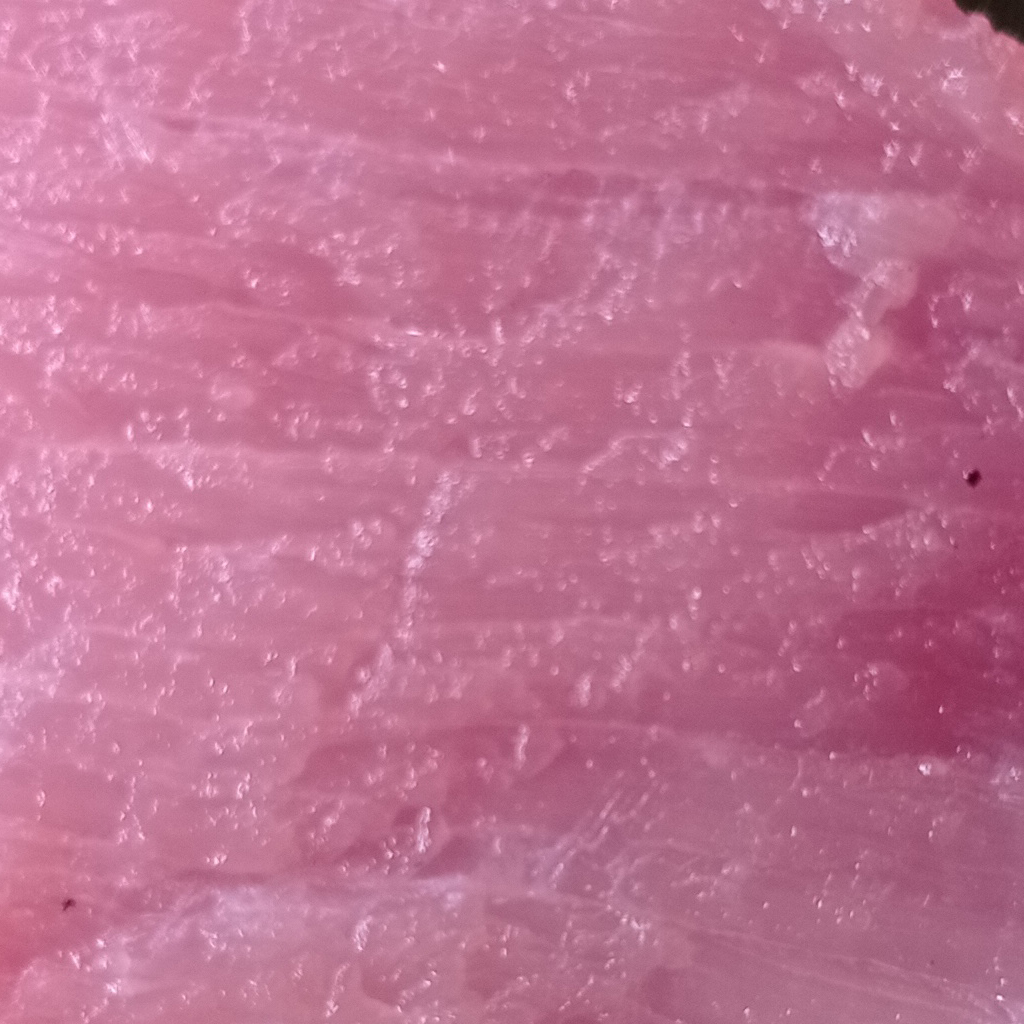

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


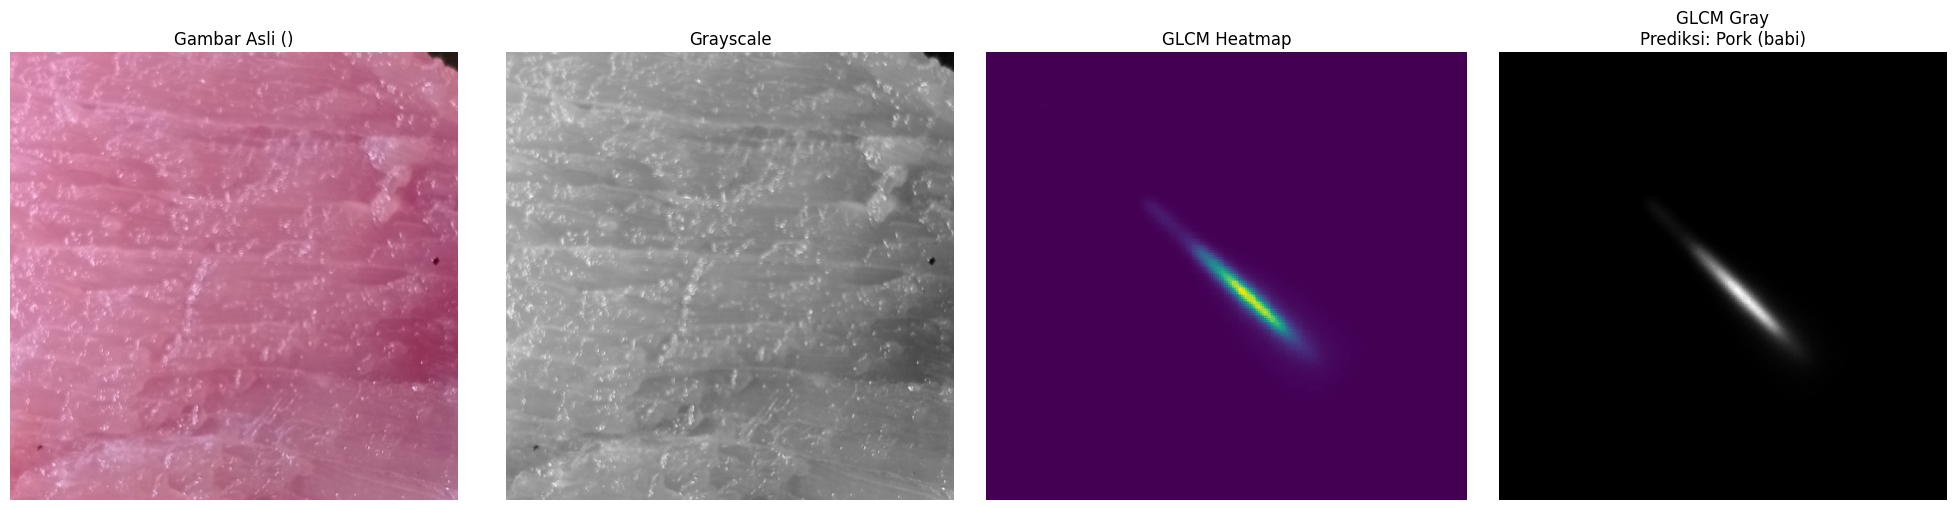

In [ ]:
# Upload gambar & prediksi
uploaded = files.upload()

from IPython.display import Image, display # Import both Image and display

for filename in uploaded.keys():
    display(Image(filename=filename))
    show_prediction_with_glcm(filename, model)

# Cobain random gambar di dataset (Ini lebih Bagus)

In [ ]:
def show_prediction_with_glcm(image_path, model):
    try:
        # Ambil label asli dari nama folder gambar (Horse Meat, Pork, Meat)
        true_label = os.path.basename(os.path.dirname(image_path))

        # Baca gambar dan ubah ke grayscale
        img = cv2.imread(image_path)
        if img is None:
            print(f"❌ Gagal membaca gambar: {image_path}")
            return

        # Ubah citra warna ke grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Hitung GLCM (Gray-Level Co-occurrence Matrix)
        glcm = graycomatrix(
            gray,
            distances=[5],      # Jarak antar piksel
            angles=[0],         # Arah horizontal
            levels=256,         # Level intensitas (8-bit)
            symmetric=True,     # Matriks simetris
            normed=True         # Normalisasi matriks
        )

        # Ekstraksi fitur dari GLCM (6 fitur tekstur klasik)
        features = [
            graycoprops(glcm, 'contrast')[0, 0],
            graycoprops(glcm, 'dissimilarity')[0, 0],
            graycoprops(glcm, 'homogeneity')[0, 0],
            graycoprops(glcm, 'energy')[0, 0],
            graycoprops(glcm, 'correlation')[0, 0],
            graycoprops(glcm, 'ASM')[0, 0]
        ]

        # Prediksi label berdasarkan fitur
        prediction = model.predict([features])[0]

        # Ambil matriks GLCM sebagai 2D array untuk visualisasi
        glcm_matrix = glcm[:, :, 0, 0]

        # Buat visualisasi 4 panel (asli, grayscale, heatmap, pure gray)
        plt.figure(figsize=(20, 5))

        # 1. Gambar Asli
        plt.subplot(1, 4, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Gambar Asli ({true_label})")
        plt.axis('off')

        # 2. Grayscale
        plt.subplot(1, 4, 2)
        plt.imshow(gray, cmap='gray')
        plt.title("Grayscale")
        plt.axis('off')

        # 3. GLCM Heatmap (warna)
        plt.subplot(1, 4, 3)
        sns.heatmap(glcm_matrix, cmap='viridis', cbar=False)
        plt.title("GLCM Heatmap")
        plt.axis('off')

        # 4. GLCM Pure Grayscale
        plt.subplot(1, 4, 4)
        plt.imshow(glcm_matrix, cmap='gray')
        plt.title(f"GLCM Gray\nPrediksi: {prediction}")
        plt.axis('off')

        # Rapatkan layout biar rapi dan manis~
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"⚠️ Error saat memproses {image_path}:\n{e}")


In [ ]:
def predict_and_show_random_images(model, dataset_path, count=3):
    # Ambil semua path gambar .jpg di semua subfolder dataset
    all_images = glob(os.path.join(dataset_path, '*', '*.jpg'))

    # Pilih acak sejumlah gambar
    sampled_images = random.sample(all_images, min(count, len(all_images)))

    # Tampilkan prediksi dan visualisasi untuk setiap gambar
    for path in sampled_images:
        show_prediction_with_glcm(path, model)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


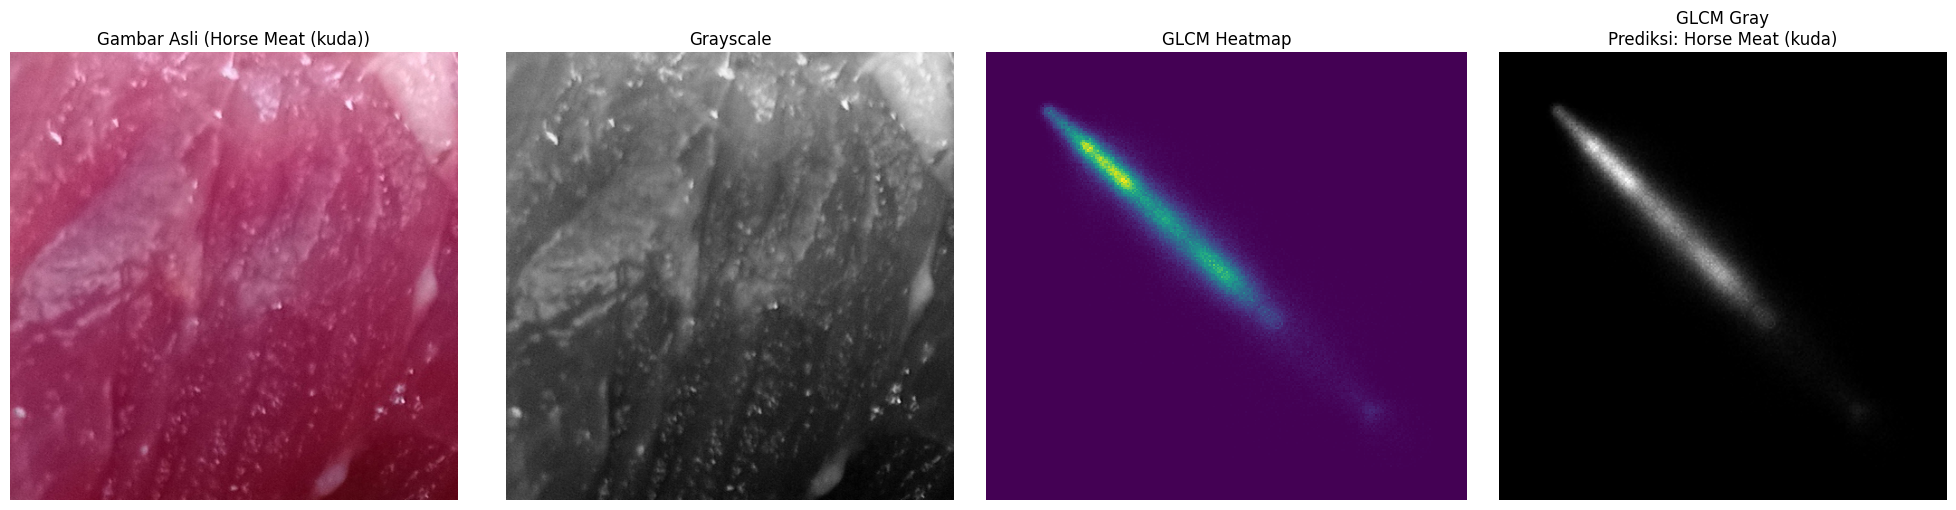

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


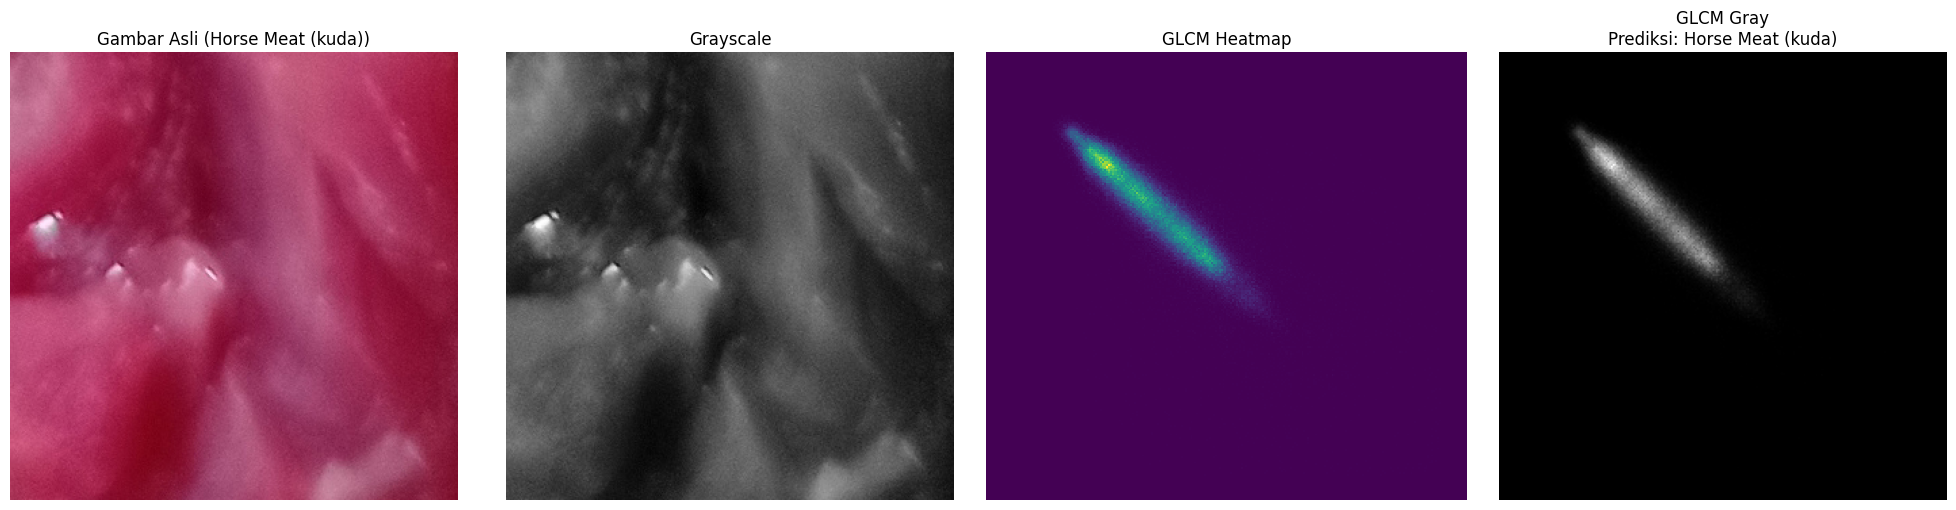

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


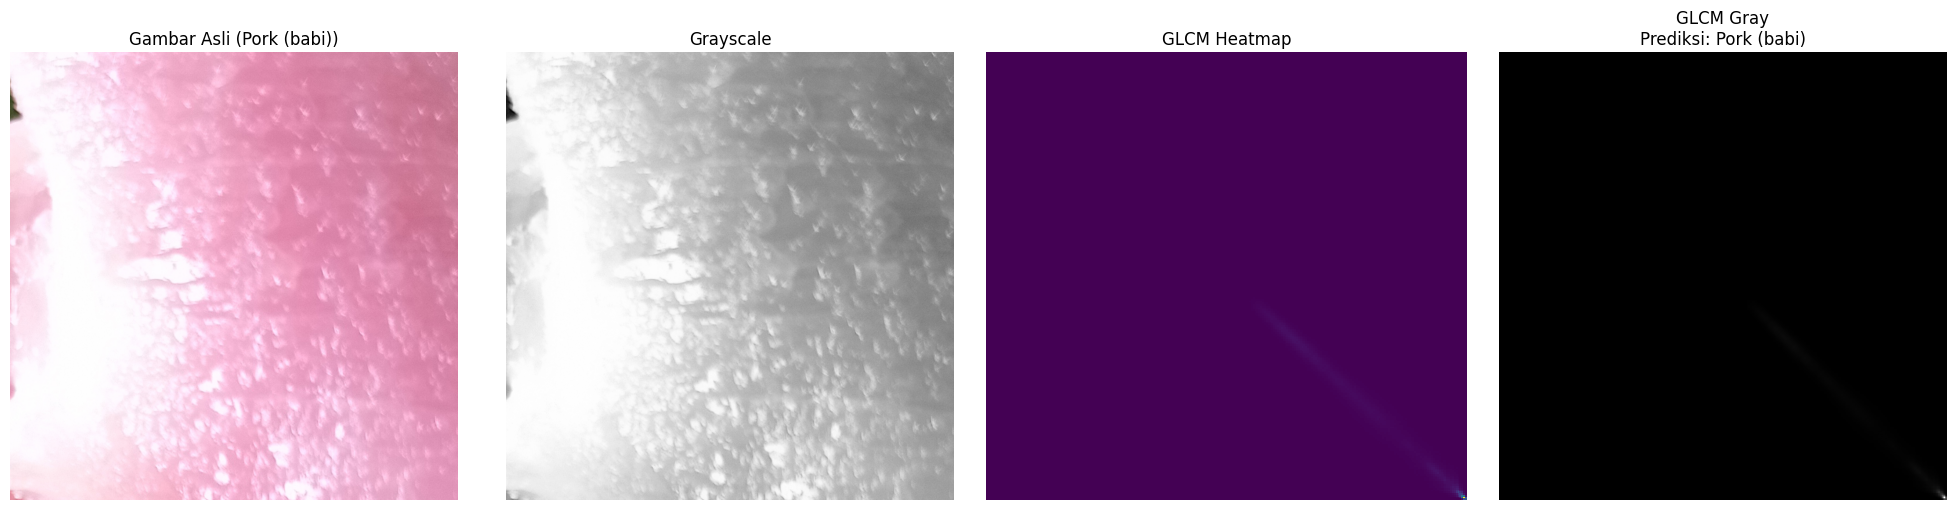

In [ ]:
# Outputnya dimari
predict_and_show_random_images(model, '/content/drive/Othercomputers/My Laptop/Semester 6/Pengolahan CItra/Teori/Tugas Besar/dataset-meat', count=3)